In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
file_id =r'C:\Users\Omar_Atif\Desktop\jupyter python\zomato.csv'
url = file_id
df = pd.read_csv(url)
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
print("Before cleaning:")
print(df.shape)
print(df.isna().sum())
print(df.describe(include='all'))

Before cleaning:
(51717, 17)
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64
                                                      url        address  \
count                                               51717          51717   
unique                                              51717          11495   
top     https://www.zomato.com/bangalore/jalsa-banasha...  Delivery Only   
freq                     

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import MinMaxScaler,robust_scale,PowerTransformer
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
# Drop irrelevant columns
drop_cols = ['url', 'address', 'phone', 'menu_item']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

In [6]:
#Check for the missing data
(df.isnull().sum()*100/df.index.size).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
location                        0.04
rest_type                       0.44
dish_liked                     54.29
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

In [7]:
len(df['location'].unique())

94

In [8]:
len(df['listed_in(city)'].unique())

30

In [9]:
locations = pd.DataFrame({'Name':df['location'].unique()})
locations.head()

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout


In [10]:
#Dropping the duplicates
df.drop_duplicates(inplace=True)
df.shape

(51645, 13)

In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
def handle_rate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return round(float(value),1)
    
df['rate'] = df['rate'].apply(handle_rate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [13]:
def handle_cost(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
    
df['votes'] = df['votes'].apply(handle_cost)
df['votes'].unique()

array([ 775.,  787.,  918., ..., 4957., 2382.,  843.], shape=(2328,))

In [14]:
#Remove the Nan values 
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [15]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [16]:
#columns to snake_case
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [17]:
# Clean 'approx_cost(for_two_people)' column
if 'approx_cost(for_two_people)' in df.columns:
    df['approx_cost(for_two_people)'] = (
        df['approx_cost(for_two_people)']
        .astype(str).str.replace(',', '')
        .astype(float)
    )

In [18]:
# Drop rows with essential missing values
df.dropna(subset=['rate', 'approx_cost(for_two_people)'], inplace=True)
print("Shape after basic cleaning:", df.shape)

Shape after basic cleaning: (23247, 13)


In [19]:
# Example: IQR method for cost column
Q1 = df['approx_cost(for_two_people)'].quantile(0.25)
Q3 = df['approx_cost(for_two_people)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [20]:
# Capping outliers instead of removing
df['approx_cost(for_two_people)'] = np.where(
    df['approx_cost(for_two_people)'] > upper_bound,
    upper_bound,
    np.where(
        df['approx_cost(for_two_people)'] < lower_bound,
        lower_bound,
        df['approx_cost(for_two_people)']
    )
)


In [21]:
# checking shape
df.shape

(23247, 13)

In [22]:
# checking for duplicated rows
df.duplicated().sum()

np.int64(0)

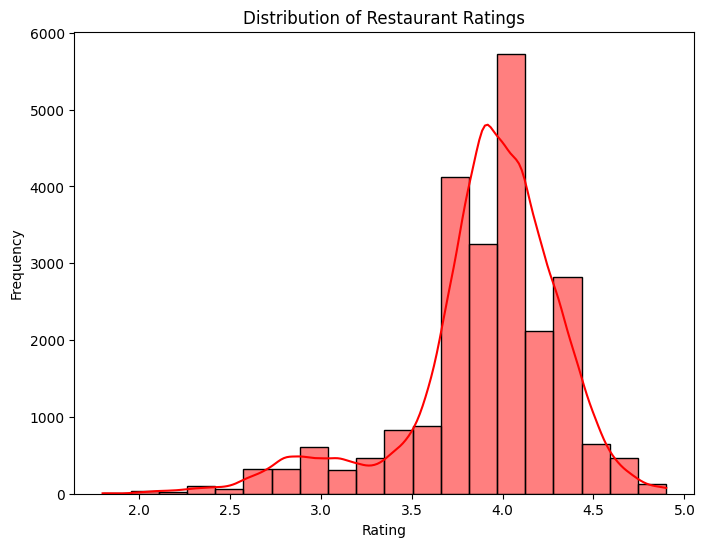

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rate'], bins=20, kde=True , color='red')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [24]:
# Remove extra spaces
df['name'] = df['name'].str.strip()

In [25]:
# Convert cuisines string to list
df['cuisines'] = df['cuisines'].astype(str).str.split(',')

In [26]:
import re
# Remove emojis and special characters from name 
def clean_text(text):
    if pd.isnull(text):
        return text
    return re.sub(r'[^\w\s,.-]', '', text)

df['name'] = df['name'].apply(clean_text)


In [27]:
# If currency column exists
if 'currency' in df.columns:
    df = df[df['currency'] == 'Indian Rupees(Rs.)']


In [28]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for_two_people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","[North Indian, Mughlai, Chinese]",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","[Chinese, North Indian, Thai]",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","[Cafe, Mexican, Italian]",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,Masala Dosa,"[South Indian, North Indian]",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","[North Indian, Rajasthani]",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


online_order
Yes    16377
No      6870
Name: count, dtype: int64


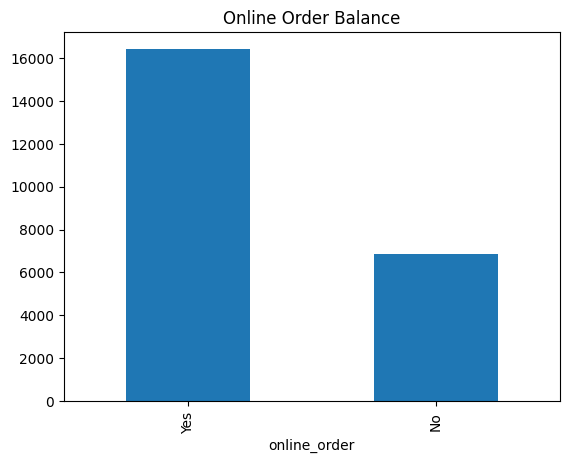

In [29]:
print(df['online_order'].value_counts())
df['online_order'].value_counts().plot(kind='bar', title='Online Order Balance')
plt.show()

online_order
Yes    16377
No     16377
Name: count, dtype: int64


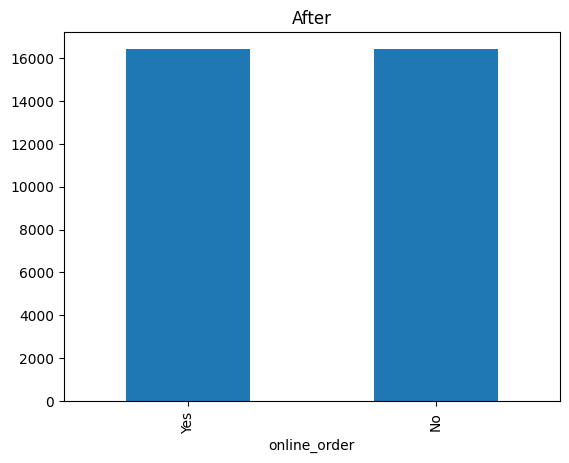

In [30]:
# By : Oversampling
from sklearn.utils import resample


df_yes = df[df['online_order'] == 'Yes']
df_no = df[df['online_order'] == 'No']
df_no_oversampled = resample(df_no, 
                           replace=True,     
                           n_samples=len(df_yes),  
                           random_state=42)
df_balanced = pd.concat([df_yes, df_no_oversampled])



print(df_balanced['online_order'].value_counts())
df_balanced['online_order'].value_counts().plot(kind='bar', title='After')
plt.show()

In [31]:
# print(df.shape)
# print(df.isna().sum())
# print(df.info())
# print(df.describe(include='all'))

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier

In [33]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for_two_people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","[North Indian, Mughlai, Chinese]",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","[Chinese, North Indian, Thai]",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","[Cafe, Mexican, Italian]",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,Masala Dosa,"[South Indian, North Indian]",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","[North Indian, Rajasthani]",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [34]:
# === Features & Target ===
X = df.drop('dish_liked', axis=1)
y = df['dish_liked']

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
# Encode target labels (text → numbers)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [36]:
listed_type_dummies = pd.get_dummies(df['listed_in(type)'], prefix='listed_type', drop_first=True)
df = pd.concat([df, listed_type_dummies], axis=1)

location_dummies = pd.get_dummies(df['location'], prefix='loc', drop_first=True)
df = pd.concat([df, location_dummies], axis=1)

rest_type_dummies = pd.get_dummies(df['rest_type'], prefix='rest_type', drop_first=True)
df = pd.concat([df, rest_type_dummies], axis=1)


In [37]:
X = df[['rate', 'votes', 'approx_cost(for_two_people)'] + list(location_dummies.columns) + 
       list(rest_type_dummies.columns) + list(listed_type_dummies.columns)]
y = df['online_order']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
y_pred = logreg.predict(X_test)

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7780645161290323

Confusion Matrix:
[[ 803 1261]
 [ 287 4624]]

Classification Report:
              precision    recall  f1-score   support

          No       0.74      0.39      0.51      2064
         Yes       0.79      0.94      0.86      4911

    accuracy                           0.78      6975
   macro avg       0.76      0.67      0.68      6975
weighted avg       0.77      0.78      0.75      6975



In [43]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9374910394265233

Confusion Matrix:
[[1790  274]
 [ 162 4749]]

Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.87      0.89      2064
         Yes       0.95      0.97      0.96      4911

    accuracy                           0.94      6975
   macro avg       0.93      0.92      0.92      6975
weighted avg       0.94      0.94      0.94      6975



In [73]:
for col in df_sampled.columns:
    df_sampled[col] = df_sampled[col].apply(lambda x: str(x) if isinstance(x, (list, dict)) else x)
target_col = 'dish_liked' 

In [76]:
# Adding SVM Model at the end of the notebook
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [77]:
# Prepare data for SVM
X = df[['rate', 'votes', 'approx_cost(for_two_people)']]
y = df['online_order'].map({'Yes': 1, 'No': 0})

In [78]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# Create SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

In [81]:
# Train the model
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [82]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)

In [83]:
# Evaluate the model
print("SVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

SVM Model Evaluation:
Accuracy: 0.7040860215053764

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2064
           1       0.70      1.00      0.83      4911

    accuracy                           0.70      6975
   macro avg       0.35      0.50      0.41      6975
weighted avg       0.50      0.70      0.58      6975


Confusion Matrix:
[[   0 2064]
 [   0 4911]]


C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

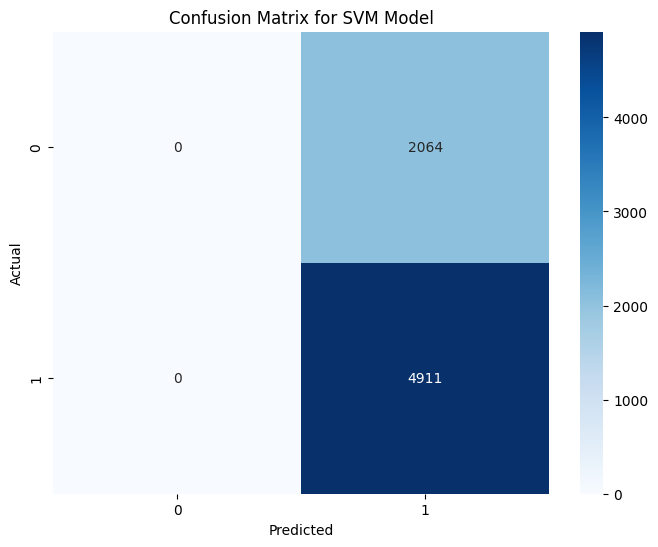

In [84]:
# Visualizing the results
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [85]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Train KNN model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [90]:
# Predictions
y_pred = knn.predict(X_test_scaled)


In [93]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)


In [95]:
print(f"KNN Model Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

KNN Model Evaluation:
RMSE: 0.2966
R2 Score: 0.5778


In [ ]:
# Import required libraries
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Check for NaN values in y_train and y_test (using np.isnan for NumPy arrays)
print("NaN in y_train:", np.isnan(y_train).sum())
print("NaN in y_test:", np.isnan(y_test).sum())
print("NaN in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaN in X_test_scaled:", np.isnan(X_test_scaled).sum())

In [ ]:
# Remove NaN values from y_train and y_test, and corresponding X_train_scaled, X_test_scaled
mask_train = ~np.isnan(y_train)
mask_test = ~np.isnan(y_test)
X_train_scaled = X_train_scaled[mask_train]
y_train = y_train[mask_train]
X_test_scaled = X_test_scaled[mask_test]
y_test = y_test[mask_test]

In [ ]:
print("NaN in y_train after cleaning:", np.isnan(y_train).sum())
print("NaN in y_test after cleaning:", np.isnan(y_test).sum())

In [ ]:
# Build the NN model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


In [ ]:
# Predictions
y_pred_nn = model.predict(X_test_scaled).flatten()


In [ ]:
# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = mse_nn ** 0.5
r2_nn = r2_score(y_test, y_pred_nn)

In [ ]:
# Print evaluation metrics
print("Neural Network Model Evaluation:")
print(f"RMSE: {rmse_nn:.4f}")
print(f"R2 Score: {r2_nn:.4f}")

Defaulting to user installation because normal site-packages is not writeable
NaN in y_train: 0
NaN in y_test: 0
NaN in X_train_scaled: 0
NaN in X_test_scaled: 0
NaN in y_train after cleaning: 0
NaN in y_test after cleaning: 0
Epoch 1/100



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 110.8139 - mae: 7.8091 - val_loss: 19.8482 - val_mae: 3.4227
Epoch 2/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.1014 - mae: 3.1155 - val_loss: 16.3946 - val_mae: 3.0210
Epoch 3/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.8729 - mae: 2.8439 - val_loss: 14.8994 - val_mae: 2.8468
Epoch 4/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.8923 - mae: 2.7091 - val_loss: 14.3277 - val_mae: 2.7061
Epoch 5/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.3812 - mae: 2.6355 - val_loss: 13.7949 - val_mae: 2.6699
Epoch 6/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.0785 - mae: 2.5920 - val_loss: 13.5424 - val_mae: 2.6895
Epoch 7/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.9043 - mae: 2.5695 - val_loss: 13.4436 - val_mae: 2.6462
Epoch 8/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.6932 - mae: 2.5471 - val_loss: 13.1895 - val_mae: 2.5870
Epoch 9/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s

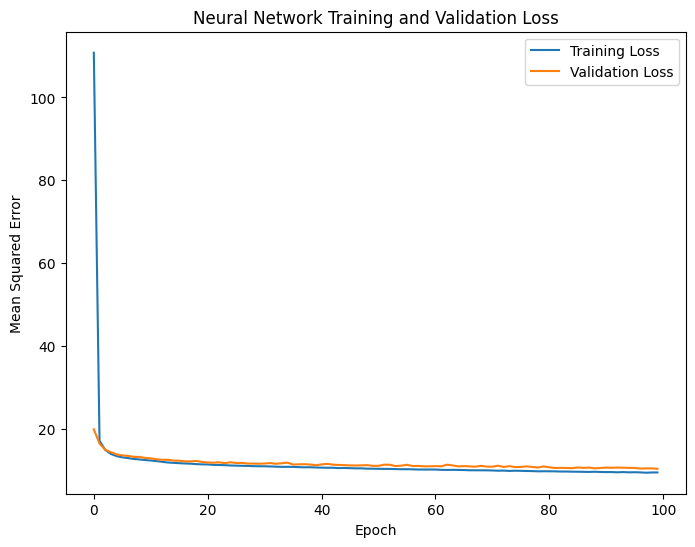

In [111]:
# Plot training & validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()